In [234]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams.update({'text.color': "gray",
                    'axes.labelcolor': "white",
                     'xtick.color': "white",
                     'ytick.color': "white"
                     })


In [235]:
pop = pd.read_csv('data/각 지역별 커피 매장수_ID부여.csv')
pop.head()


,ID,시도명,시군구명,빽다방,스타벅스,이디야,커피빈
0,강릉,강원도,강릉시,2.0,4.0,17.0,0.0
1,고성(강원),강원도,고성군,0.0,1.0,0.0,0.0
2,동해,강원도,동해시,1.0,1.0,1.0,1.0
3,삼척,강원도,삼척시,1.0,0.0,5.0,0.0
4,속초,강원도,속초시,0.0,4.0,9.0,0.0


In [236]:
# 지도모양
map_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')

In [237]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
map.columns = ['y', 'x', 'ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [238]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

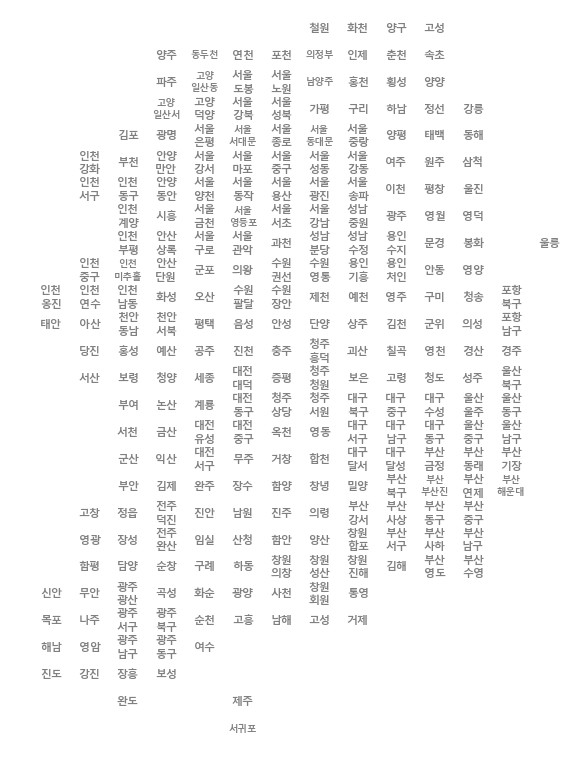

In [239]:
plt.figure(figsize=(8, 11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시
    # (중구, 서구 등)
    if len(row.ID.split()) == 2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2] == '고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center',
                 linespacing=linespacing)

# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='white', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [240]:
pop.tail()

,ID,시도명,시군구명,빽다방,스타벅스,이디야,커피빈
242,청주 흥덕,충청북도,흥덕구,6.0,8.0,17.0,0.0
243,충주,충청북도,충주시,2.0,4.0,8.0,0.0
244,의성,경상북도,의성군,0.0,0.0,0.0,0.0
245,군위,경상북도,군위군,0.0,0.0,0.0,0.0
246,의령,경상남도,의령군,0.0,0.0,0.0,0.0


In [241]:
pop['커피지수'] = round((pop.스타벅스 + pop.커피빈) / (pop.이디야 + pop.빽다방), 3)
pop.head()

,ID,시도명,시군구명,빽다방,스타벅스,이디야,커피빈,커피지수
0,강릉,강원도,강릉시,2.0,4.0,17.0,0.0,0.211
1,고성(강원),강원도,고성군,0.0,1.0,0.0,0.0,inf
2,동해,강원도,동해시,1.0,1.0,1.0,1.0,1.000
3,삼척,강원도,삼척시,1.0,0.0,5.0,0.0,0.000
4,속초,강원도,속초시,0.0,4.0,9.0,0.0,0.444


In [242]:
pop.replace([np.inf],1, inplace=True)
pop.fillna(0, inplace=True)
pop.head(3)

,ID,시도명,시군구명,빽다방,스타벅스,이디야,커피빈,커피지수
0,강릉,강원도,강릉시,2.0,4.0,17.0,0.0,0.211
1,고성(강원),강원도,고성군,0.0,1.0,0.0,0.0,1.000
2,동해,강원도,동해시,1.0,1.0,1.0,1.0,1.000


In [243]:
pop.tail(3)

,ID,시도명,시군구명,빽다방,스타벅스,이디야,커피빈,커피지수
244,의성,경상북도,의성군,0.0,0.0,0.0,0.0,0.0
245,군위,경상북도,군위군,0.0,0.0,0.0,0.0,0.0
246,의령,경상남도,의령군,0.0,0.0,0.0,0.0,0.0


In [244]:
pop = pd.merge(pop, map)
pop.head()

,ID,시도명,시군구명,빽다방,스타벅스,이디야,커피빈,커피지수,y,x
0,강릉,강원도,강릉시,2.0,4.0,17.0,0.0,0.211,3,11
1,고성(강원),강원도,고성군,0.0,1.0,0.0,0.0,1.000,0,10
2,동해,강원도,동해시,1.0,1.0,1.0,1.0,1.000,4,11
3,삼척,강원도,삼척시,1.0,0.0,5.0,0.0,0.000,5,11
4,속초,강원도,속초시,0.0,4.0,9.0,0.0,0.444,1,10


In [245]:
pop.to_csv('data/각 지역별 커피 매장수_최종.csv', index=False)

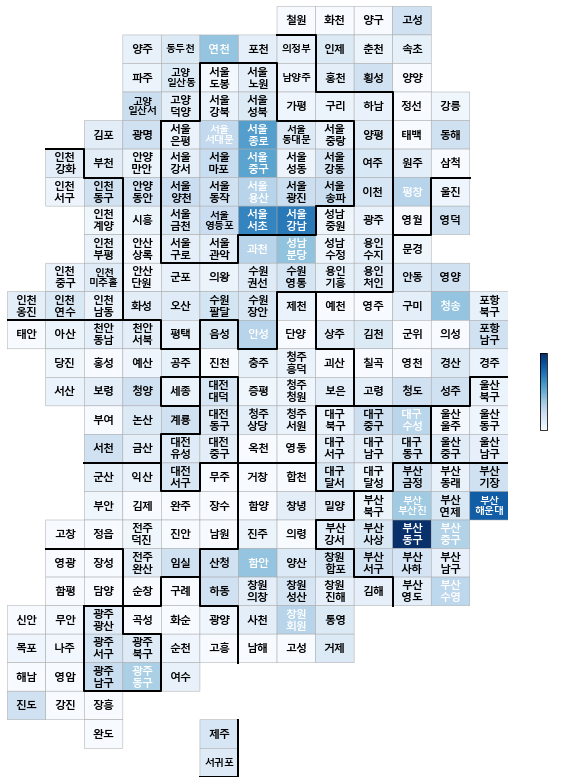

In [246]:
drawKorea('커피지수', pop, 'Blues')